In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
data = pd.read_csv("cardio_train.csv", delimiter = ";")

In [12]:
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


/Users/Grady/216Project/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


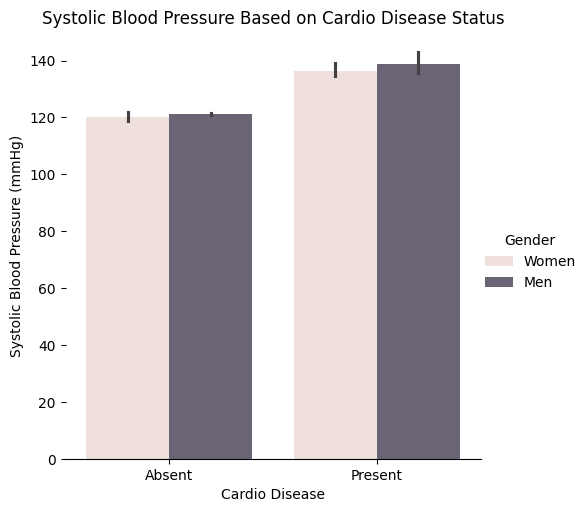

In [106]:
# Systolic Blood Pressure Bar Chart
g = sns.catplot(data = data.dropna(), kind="bar", x = "cardio",
               y = "ap_hi", hue="gender", alpha = 0.7)
g.despine(left=True)
g.set(xlabel="Cardio Disease", ylabel="Systolic Blood Pressure (mmHg)",
     title="Systolic Blood Pressure Based on Cardio Disease Status",
     xticklabels=["Absent", "Present"])
g._legend.set_title("Gender")
new_labels = ["Women", "Men"]
for t, l in zip(g._legend.texts, new_labels): #got this code from ChatGPT
   t.set_text(l)
g._legend.set_bbox_to_anchor([1.05, 0.5])


/Users/Grady/216Project/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


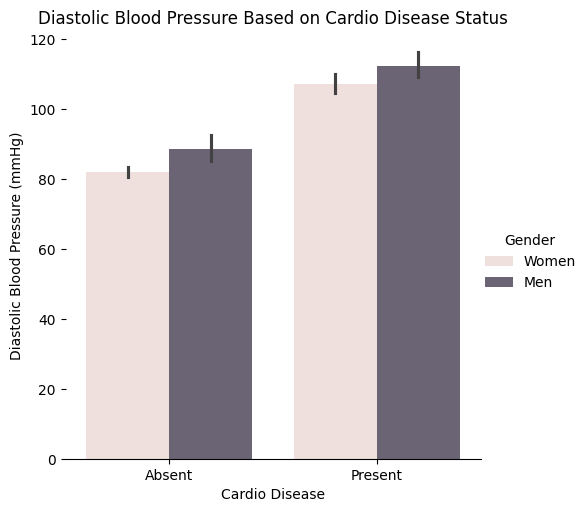

In [107]:
# Diastolic Blood Pressure Bar Chart
h = sns.catplot(data = data.dropna(), kind="bar", x = "cardio",
               y = "ap_lo", hue="gender", alpha = 0.7)
h.despine(left=True)
h.set(xlabel="Cardio Disease", ylabel="Diastolic Blood Pressure (mmHg)",
     title="Diastolic Blood Pressure Based on Cardio Disease Status",
     xticklabels=["Absent", "Present"])
h._legend.set_title("Gender")
new_labels = ["Women", "Men"]
for t, l in zip(h._legend.texts, new_labels): #got this code from ChatGPT
   t.set_text(l)
h._legend.set_bbox_to_anchor([1.05, 0.5])


In [3]:
# Loading in the dataframes
heart_disease = pd.read_excel("heart_disease.xlsx")
intensive = pd.read_excel("cardiac_intensive.xlsx")
rehab = pd.read_excel("cardiac_rehab.xlsx")
cardio_physicians = pd.read_excel("cardio_disease.xlsx")
urban = pd.read_excel("urban_status.xlsx")

# Renaming the Value columns in the Dataframes
heart_disease = heart_disease.rename(columns={'Value': 'heart_disease_death_rate'})
intensive = intensive.rename(columns={'Value': 'intensive_care_units'})
rehab = rehab.rename(columns={'Value': 'rehabilitation_units'})
cardio_physicians = cardio_physicians.rename(columns={'Value': 'cardiac_physicians'})
urban = urban.rename(columns={'Value': 'urban_status'})

# Dropping the Category_Range column
heart_disease = heart_disease.drop(columns=['Category Range'])
intensive = intensive.drop(columns=['Category Range'])
rehab = rehab.drop(columns=['Category Range'])
cardio_physicians = cardio_physicians.drop(columns=['Category Range'])
urban = urban.drop(columns=['Category Range'])

heart_disease.head(5)

,County,State,heart_disease_death_rate
0,Summit,CO,38.3
1,Pitkin,CO,42.9
2,Eagle,CO,50.2
3,San Juan,WA,59.7
4,Valley,ID,63.6


In [4]:
# Creating the final dataframe for data collected from the Interactive Atlas

merge1 = pd.merge(heart_disease, intensive, how='outer', on=['County', 'State'])
merge2 = pd.merge(merge1, rehab, how='outer', on=['County', 'State'])
merge3 = pd.merge(merge2, cardio_physicians, how='outer', on=['County', 'State'])
final_df = pd.merge(merge3, urban, how='outer', on=['County', 'State'])

# Adding NAs
final_df.replace("Insufficient Data", np.nan, inplace=True)
final_df

/var/folders/vg/l9_lczzd2z1_4mnqy6nj666c0000gq/T/ipykernel_44951/3744358787.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set(xlabel='Metro Status', ylabel = "Heart Disease Death Rate per 100,000",


[Text(0.5, 0, 'Metro Status'),
 Text(0, 0.5, 'Heart Disease Death Rate per 100,000'),
 Text(0.5, 1.0, 'Heart Disease Death Rates per 100,000 by Urbanicity'),
 [Text(0, 0, 'Large Central'),
  Text(1, 0, 'Large Fringe'),
  Text(2, 0, 'Medium/small'),
  Text(3, 0, 'Nonmetro')]]

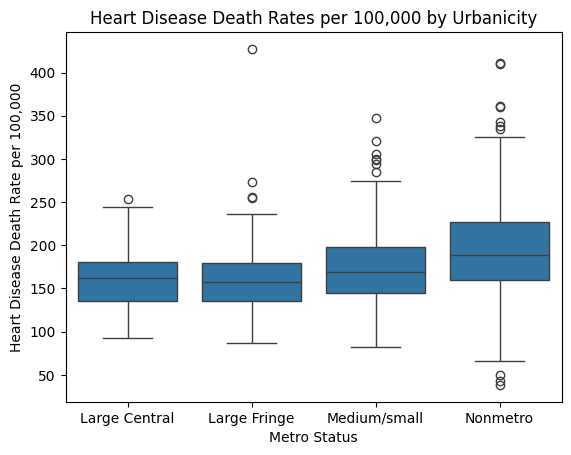

In [101]:
# Boxlpot with heart disease rate based on urban status
fig = sns.boxplot(final_df.dropna(), x='urban_status', y='heart_disease_death_rate')
fig.set(xlabel='Metro Status', ylabel = "Heart Disease Death Rate per 100,000",
       title="Heart Disease Death Rates per 100,000 by Urbanicity",
       xticklabels=["Large Central", "Large Fringe", "Medium/small", "Nonmetro"])

<Axes: >

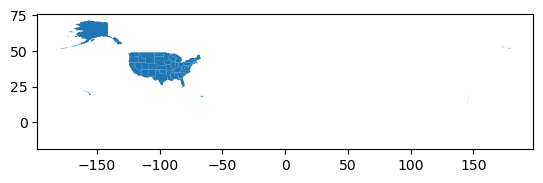

In [3]:
# Building geographic plot
import matplotlib.pyplot as plt
import geopandas as gpd
states = gpd.read_file('map/tl_2023_us_state.shp')
df = states.to_crs("EPSG:4326")
df.plot()


In [2]:
# This might be easier to use for the mapping

import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()